# ValidMind Introduction for Model Developers

This interactive notebook guides you through the process of documenting a model with the ValidMind Developer Framework. It uses a binary classification model as an example, but the same principles apply to other model types.

As part of the notebook, you will learn how to start documenting a model as a **Model Developer**. At this stage the assumption is that there is a [Model Documentation template](https://docs.validmind.com/guide/swap-documentation-templates.html#view-current-templates) defined in the platform.

## Overview of the Notebook

**1. Initialize the ValidMind Developer Framework**

ValidMind’s developer framework provides a rich collection of documentation tools and test suites, from documenting descriptions of datasets to validation and testing of models using a variety of open source testing frameworks.

**2. Start the model development process with raw data, run out-of-the box tests and add evidence to model documentation**

In this stage the notebook will provide details on how to access ValidMind's test repository of individual tests that you will use as building blocks to ensure a model is being built appropriately. The goal is to show how to run tests, investigate results and add tests results / evidence to the documentation.

For a full list of out-of-box tests please refer to: https://docs.validmind.com/guide/test-descriptions.html

**3. Building upon the previous step, you you wil learn how to implement custom tests**

Usually, model developers have a lot of their own custom tests and it is important to include this within the model documentation. We will show how you how to include custom tests and then how they can be added to documentation as additional evidence.

**4. Ensure completion of documentation**

In this stage the notebook will provide details on how to ensure that model documentation and associated sections in the model documentation have been built out, providing instructions to run tests end to end for one or more sections, and showing you how to make configuration changes to idnvidual tests.


## ValidMind at a glance

ValidMind's platform enables organizations to identify, document, and manage model risks for all types of models, including AI/ML models, LLMs, and statistical models. As a model developer, you use the ValidMind Developer Framework to automate documentation and validation tests, and then use the ValidMind AI Risk Platform UI to collaborate on model documentation. Together, these products simplify model risk management, facilitate compliance with regulations and institutional standards, and enhance collaboration between yourself and model validators.

If this is your first time trying out ValidMind, you can make use of the following resources alongside this notebook:

- [Get started](https://docs.validmind.ai/guide/get-started.html) — The basics, including key concepts, and how our products work
- [Get started with the ValidMind Developer Framework](https://docs.validmind.ai/guide/get-started-developer-framework.html) — The path for developers, more code samples, and our developer reference

It is important to note that in order to connect to the Developer Framework you will have to access this through our API's using Python.


## Before you begin

::: {.callout-tip}

### New to ValidMind?

For access to all features available in this notebook, create a free ValidMind account.

Signing up is FREE — [**Sign up now**](https://app.prod.validmind.ai)
:::

If you encounter errors due to missing modules in your Python environment, install the modules with `pip install`, and then re-run the notebook. For more help, refer to [Installing Python Modules](https://docs.python.org/3/installing/index.html).


## 1. Initializing the ValidMind Developer Framework


## Install the client library

Please note the following recommended Python versions to utilize:

- Python version 3.7 > x <= 3.11

The client library provides Python support for the ValidMind Developer Framework. To install it run:


In [78]:
%pip install -q validmind

You should consider upgrading via the '/Users/andres/code/validmind-sdk/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Register a new model in ValidMind UI and initialize the client library

ValidMind generates a unique _code snippet_ for each registered model to connect with your developer environment. You initialize the client library with this code snippet, which ensures that your documentation and tests are uploaded to the correct model when you run the notebook.

Get your code snippet:

1. In a browser, log into the [Platform UI](https://app.prod.validmind.ai).

2. In the left sidebar, navigate to **Model Inventory** and click **+ Register new model**.

3. Enter the model details and click **Continue**. ([Need more help?](https://docs.validmind.ai/guide/register-models-in-model-inventory.html))

   For example, to register a model for use with this notebook, select:

   - Documentation template: `Binary classification`
   - Use case: `Marketing/Sales - Attrition/Churn Management`

   You can fill in other options according to your preference.

4. Go to **Getting Started** and click **Copy snippet to clipboard**.

Next, replace this placeholder with your own code snippet:


In [79]:
# # Replace with your code snippet

# import validmind as vm

# vm.init(
#     api_host="https://api.prod.validmind.ai/api/v1/tracking",
#     api_key="...",
#     api_secret="...",
#     project="...",
# )

## Verify & preview the documentation template

Here we want to verify that we have connected with ValidMnd and that the appropriate template is selected. A template predefines sections for your model documentation and provides a general outline to follow, making the documentation process much easier.

You will upload documentation and test results into this template later on. For now, take a look at the structure that the template provides with the `vm.preview_template()` function from the ValidMind library and note the empty sections:


In [80]:
vm.preview_template()

Accordion(children=(Accordion(children=(VBox(children=(HTML(value='\n<div\n  class="lm-Widget p-Widget jupyter…

Finally let's observe the the list of all available tests in the ValidMind Developer Framework:


In [81]:
vm.tests.list_tests()

Test Type,Name,Description,ID
ThresholdTest,Bias,Evaluates bias in a Large Language Model based on the order and distribution of exemplars in a prompt....,validmind.prompt_validation.Bias
ThresholdTest,Clarity,Evaluates and scores the clarity of prompts in a Large Language Model based on specified guidelines....,validmind.prompt_validation.Clarity
ThresholdTest,Specificity,"Evaluates and scores the specificity of prompts provided to a Large Language Model (LLM), based on clarity,...",validmind.prompt_validation.Specificity
ThresholdTest,Robustness,Assesses the robustness of prompts provided to a Large Language Model under varying conditions and contexts....,validmind.prompt_validation.Robustness
ThresholdTest,Negative Instruction,"Evaluates and grades the use of affirmative, proactive language over negative instructions in LLM prompts....",validmind.prompt_validation.NegativeInstruction
ThresholdTest,Conciseness,Analyzes and grades the conciseness of prompts provided to a Large Language Model....,validmind.prompt_validation.Conciseness
ThresholdTest,Delimitation,Evaluates the proper use of delimiters in prompts provided to Large Language Models....,validmind.prompt_validation.Delimitation
Metric,Bert Score,"Evaluates text generation models' performance by calculating precision, recall, and F1 score based on BERT...",validmind.model_validation.BertScore
Metric,Regard Score,**Purpose:**...,validmind.model_validation.RegardScore
Metric,Bleu Score,Assesses translation quality by comparing machine-translated sentences with human-translated ones using BLEU score....,validmind.model_validation.BleuScore


## 2. Start the model development process with raw data and run out-of-the box tests and add evidence to model documentation

In this section we will provide details on how to understand individual tests available in ValidMind, how you can access each test, run it and change parameters if necessary. You will be using an example dataset provided by ValidMind.


In [82]:
from validmind.datasets.classification import customer_churn as demo_dataset

df_raw = demo_dataset.load_data()
df_raw.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's do some data quality assessments by running a few individual tests related to data assessment. You will be using the `vm.tests.list_tests()` function above in combination with `vm.tests.list_tags()` and `vm.tests.list_task_types()` to find which prebuilt tests are relevant for data quality assessment.


In [83]:
# Get the list of available tags
sorted(vm.tests.list_tags())

['AUC',
 'anomaly_detection',
 'binary_classification',
 'categorical_data',
 'correlation',
 'credit_risk',
 'data_distribution',
 'data_quality',
 'feature_importance',
 'few_shot',
 'forecasting',
 'frequency_analysis',
 'kmeans',
 'llm',
 'logistic_regression',
 'model_comparison',
 'model_diagnosis',
 'model_interpretation',
 'model_metadata',
 'model_performance',
 'model_selection',
 'multiclass_classification',
 'nlp',
 'numerical_data',
 'regard_histogram',
 'regard_score',
 'risk_analysis',
 'seasonality',
 'senstivity_analysis',
 'sklearn',
 'stationarity',
 'statistical_test',
 'statsmodels',
 'tabular_data',
 'text_data',
 'text_embeddings',
 'time_series_data',
 'toxicity_histogram',
 'toxicity_line_plot',
 'unit_root_test',
 'visualization',
 'zero_shot']

In [84]:
# Get the list of available task types
sorted(vm.tests.list_task_types())

['classification',
 'clustering',
 'feature_extraction',
 'regression',
 'text_classification',
 'text_summarization']

We can pass `tags` and `task_types` as parameters to the `vm.tests.list_tests()` function to filter the tests based on the tags and task types. For example, to find tests related to tabular data quality for classification models, you can call `list_tests()` like this:


In [85]:
vm.tests.list_tests(task="classification", tags=["tabular_data", "data_quality"])

Test Type,Name,Description,ID
Metric,Missing Values Risk,Assesses and quantifies the risk related to missing values in a dataset used for training an ML model....,validmind.data_validation.MissingValuesRisk
ThresholdTest,Skewness,Evaluates the skewness of numerical data in a machine learning model and checks if it falls below a set maximum...,validmind.data_validation.Skewness
ThresholdTest,Duplicates,"Tests dataset for duplicate entries, ensuring model reliability via data quality verification....",validmind.data_validation.Duplicates
Metric,Missing Values Bar Plot,Creates a bar plot showcasing the percentage of missing values in each column of the dataset with risk...,validmind.data_validation.MissingValuesBarPlot
ThresholdTest,High Cardinality,Assesses the number of unique values in categorical columns to detect high cardinality and potential overfitting....,validmind.data_validation.HighCardinality
ThresholdTest,Missing Values,Evaluates dataset quality by ensuring missing value ratio across all features does not exceed a set threshold....,validmind.data_validation.MissingValues
ThresholdTest,High Pearson Correlation,Identifies highly correlated feature pairs in a dataset suggesting feature redundancy or multicollinearity....,validmind.data_validation.HighPearsonCorrelation


### Initialize the ValidMind datasets

Now we assume we have identified some tests we want to run with regards to the data we are intending to use. The next step is to connect your data with a ValidMind dataset object. This step is always necessary every time you want to connect a dataset to documentation and produce tests through ValidMind. You only need to do it one time per dataset.

You can initialize a ValidMind dataset object using the [`init_dataset`](https://docs.validmind.ai/validmind/validmind.html#init_dataset) function from the ValidMind (`vm`) module.

This function takes a number of arguments:

- `dataset` — the raw dataset that you want to provide as input to tests
- `input_id` - a unique identifier that allows tracking what inputs are used when running each individual test
- `target_column` — a required argument if tests require access to true values. This is the name of the target column in the dataset


In [86]:
# vm_raw_dataset is now a VMDataset object that you can pass to any ValidMind test
vm_raw_dataset = vm.init_dataset(
    dataset=df_raw,
    input_id="raw_dataset",
    target_column="Exited",
)

2024-04-26 15:32:25,173 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


### Run some tabular data tests

Individual tests can be easily run by calling the `run_test` function provided by the `validmind.tests` module. The function takes the following arguments:

- `test_id`: The ID of the test to run. To find a particular test and get its ID, refer to the [explore_tests](../how_to/explore_tests.ipynb) notebook. Look above for example after running 'vm.test_suites.describe_suite' as column 'Test ID' will contain the id.
- `params`: A dictionary of parameters for the test. These will override any `default_params` set in the test definition. Refer to the [explore_tests](../how_to/explore_tests.ipynb) notebook to find the default parameters for a test. See below for examples.

The inputs expected by a test can also be found in the test definition. Let's take `validmind.data_validation.DescriptiveStatistics` as an example. Note that the output of the `describe_test()` function below shows that this test expects a `dataset` as input:


In [87]:
vm.tests.describe_test("validmind.data_validation.DescriptiveStatistics")

HTML(value='\n<div>\n  <h2>Descriptive Statistics</h2>\n  <p>Performs a detailed descriptive statistical analy…

Now, let's run a few tests to assess the quality of the dataset.


In [88]:
test = vm.tests.run_test(
    test_id="validmind.data_validation.DescriptiveStatistics",
    inputs={"dataset": vm_raw_dataset},
)

In [89]:
test2 = vm.tests.run_test(
    test_id="validmind.data_validation.ClassImbalance",
    inputs={"dataset": vm_raw_dataset},
    params={"min_percent_threshold": 30},
)

You can see that the class imbalance test did not pass accordig to the value of `min_percent_threshold` we have set. Here is how you can re-run the test on some processed data to address this data quality issue. In this case we apply a very simple rebalance technique to the dataset.


In [90]:
import pandas as pd

df_raw_new = df_raw.sample(frac=1)  # Create a copy of the raw dataset

# Create a balanced dataset with the same number of exited and not exited customers
exited_df = df_raw_new.loc[df_raw_new["Exited"] == 1]
not_exited_df = df_raw_new.loc[df_raw_new["Exited"] == 0].sample(n=exited_df.shape[0])

new_df = pd.concat([exited_df, not_exited_df])
new_df_raw = new_df.sample(frac=1, random_state=42)

With this new raw dataset you can re-run the individual test to see if it passes the class imbalance test requirement. Remember to register new VM dataset object since that is the type of input required by `run_test()`:


In [91]:
# Register new data and now 'vm_raw_dataset_new' is the new dataset object of interest
vm_raw_dataset_new = vm.init_dataset(
    dataset=new_df_raw,
    input_id="new_df_raw",
    target_column="Exited",
)

2024-04-26 15:32:25,780 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


In [92]:
test = vm.tests.run_test(
    test_id="validmind.data_validation.ClassImbalance",
    inputs={"dataset": vm_raw_dataset_new},
    params={"min_percent_threshold": 30},
)

### Utilize Test Output

Below is an example on how you can utilize the output from a ValidMind test for futher use, for example, if you want to remove highly correlated features then the below shows how you can get a pearson's correlation matrix, use the output to reduce the feature list for modeling


In [93]:
corr_results = vm.tests.run_test(
    test_id="validmind.data_validation.HighPearsonCorrelation",
    params={"max_threshold": 0.3},
    inputs={"dataset": vm_raw_dataset_new},
)

Let's assume we want to remove highly correlated features from the dataset. `corr_results` is an object of type `ThresholdTestResult` and we can inspects its individual `results` to get access to the features that failed the test. In general, all ValidMind tests can return two different types of results:

- [MetricResult](https://docs.validmind.ai/validmind/validmind/vm_models.html#MetricResult): most metrics return this type of result
- [ThresholdTestResult](https://docs.validmind.ai/validmind/validmind/vm_models.html#ThresholdTest): metrics that compare a metric to a threshold return this type of result


In [94]:
print(corr_results.test_results)
print("test_name: ", corr_results.test_results.test_name)
print("params: ", corr_results.test_results.params)
print("passed: ", corr_results.test_results.passed)
print("results: ", corr_results.test_results.results)

ThresholdTestResults(test_name='validmind.data_validation.HighPearsonCorrelation', ref_id='52ce55fb-c187-4693-b3ed-620683c4e1f7', params={'max_threshold': 0.3}, passed=False, results=[ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.3445510662646786}]}, test_name=None, column='Age', passed=False), ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.18205355163990675}]}, test_name=None, column='Balance', passed=True), ThresholdTestResult(values={'correlations': [{'column': 'IsActiveMember', 'correlation': -0.17516352395850662}]}, test_name=None, column='Exited', passed=True), ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.14597783960887228}]}, test_name=None, column='Balance', passed=True), ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.04853776584822159}]}, test_name=None, column='Exited', passed=True), ThresholdTestResult(values={'cor

Let's inspect the `results` and extract a list of features that failed the test:


In [95]:
corr_results.test_results.results

[ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.3445510662646786}]}, test_name=None, column='Age', passed=False),
 ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.18205355163990675}]}, test_name=None, column='Balance', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'IsActiveMember', 'correlation': -0.17516352395850662}]}, test_name=None, column='Exited', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.14597783960887228}]}, test_name=None, column='Balance', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.04853776584822159}]}, test_name=None, column='Exited', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': 0.046539873078791094}]}, test_name=None, column='IsActiveMember', passed=True),
 ThresholdTestResult(values={'correlations

Remove the highly correlated features and create a new VM dataset object. Note the use of different `input_id`s. This allows tracking the inputs used when running each individual test.


In [96]:
high_correlation_features = [
    result.column
    for result in corr_results.test_results.results
    if result.passed == False
]
high_correlation_features

['Age']

In [97]:
# Remove the highly correlated features from the dataset
new_df_raw.drop(columns=high_correlation_features, inplace=True)

# Re-initialize the dataset object
vm_raw_dataset_new = vm.init_dataset(
    dataset=new_df_raw,
    input_id="new_df_raw_no_age",
    target_column="Exited",
)

2024-04-26 15:32:26,181 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


Re-running the test with the reduced feature set should pass the test. You can also plot the correlation matrix to visualize the new correlation between features:


In [98]:
corr_results = vm.tests.run_test(
    test_id="validmind.data_validation.HighPearsonCorrelation",
    params={"max_threshold": 0.3},
    inputs={"dataset": vm_raw_dataset_new},
)

In [99]:
corr_results = vm.tests.run_test(
    test_id="validmind.data_validation.PearsonCorrelationMatrix",
    inputs={"dataset": vm_raw_dataset_new},
)

### Documenting the results based on two datasets

We have now done some analysis on two different datasets and we should able to document why certain things were done to the raw data with testing to support it. Every test result returned by the `run_test()` function has a `.log()` method that can be used to log the test results to ValidMind. When logging individual results to ValidMind you will need to manually add those results in a specific section of the model documentation.

When using `run_documentation_tests()`, it's possible to automatically populate a section with the results of all tests that were registered in the documentation template.

To populate the data preparation section of the documentatio, you will now complete the following steps:

1. Run `run_documentation_tests()` using `vm_raw_dataset_new` as input
2. Log the individual result high correlation test using `vm_raw_dataset` (no data cleanup)
3. Log the individual result high correlation test using `vm_raw_dataset_new` (balanced classes and reduced features)

After adding test driven blocks for steps #2 and #3 you will be able to explain the changes made to the raw data by editing the default description of the test result.


#### Run `run_documentation_tests()` using `vm_raw_dataset_new` as input

`run_documentation_tests()` allows you to run multiple tests at once and log the results to the documentation. The function takes the following arguments:

- `inputs`: any inputs to be passed to the tests
- `config`: a dictionary `<test_id>:<test_config>` that allows configuring each test individually. Each test config has the following form:
  - `params`: individual test parameters
  - `inputs`: individual test inputs. When passed, this overrides any inputs passed from the `run_documentation_tests()` function


In [100]:
test_config = {
    "validmind.data_validation.ClassImbalance": {
        "params": {"min_percent_threshold": 30},
    },
    "validmind.data_validation.HighPearsonCorrelation": {
        "params": {"max_threshold": 0.3},
    },
}

tests_suite = vm.run_documentation_tests(
    inputs={
        "dataset": vm_raw_dataset_new,
    },
    config=test_config,
    section=["data_preparation"],
)

#### Log the individual result high correlation test using `vm_raw_dataset` (no data cleanup)

Here you can use a custom `result_id` to tag the individual result with a unique identifier. This `result_id` can be appended to `test_id` with a `:` separator.


In [101]:
result = vm.tests.run_test(
    test_id="validmind.data_validation.HighPearsonCorrelation:vm_raw_dataset",
    params={"max_threshold": 0.3},
    inputs={"dataset": vm_raw_dataset},
)
result.log()

#### Log the individual result high correlation test using `vm_raw_dataset_new` (balanced classes and reduced features)

Repeat the same process as above but with the new dataset, using a new `result_id`.


In [102]:
result = vm.tests.run_test(
    test_id="validmind.data_validation.HighPearsonCorrelation:vm_raw_dataset_new",
    params={"max_threshold": 0.3},
    inputs={
        "dataset": vm_raw_dataset_new,
    },
)
result.log()

### Add individual test results to model documentation

You can now visit the documentation page for the model you connected to at the beginning of this notebook and add a new content block in the relevant section.

To do this, go to the documentation page of your model and navigate to the `Data Preparation` -> `Correlations and Interactions` section. Then hover after the "Pearson Correlation Matrix" content block to reveal the `+` button as shown in the screenshot below.

![screenshot showing insert button for test-driven blocks](../images/insert-test-driven-block.png)

Click on the `+` button and select `Test-Driven Block`. This will open a dialog where you can select `Threshold Test` as the type of the test-driven content block, and then select the `High Pearson Correlation Vm Raw Dataset Test` metric. This will show a preview of the result and it should match the results shown above.

![screenshot showing the selected test result in the dialog](../images/selecting-high-pearson-correlation-test.png)

Finally, click on the `Insert block` button to add the test result to the documentation. You'll now see two individual results for the high correlation test in the `Correlations and Interactions` section of the documentation. To finalize the documentation, you can edit the test result's description block to explain the changes made to the raw data and the reasons behind them as we can see in the screenshot below.

![screenshot showing the high pearson correlation block](../images/high-pearson-correlation-block.png)


### Model Testing

We have focused so far on the data assessment and pre-processing that usually occurs prior to any models being built. Now we are going to assume we have built a model and now we want to incorporate some model results in our documentation.

Let's train a simple logistic regression model on the dataset and evaluate its performance. You will use the `LogisticRegression` class from the `sklearn.linear_model` and use ValidMind tests to evaluate the model's performance.

Before training the model, we need to encode the categorical features in the dataset. You will use the `OneHotEncoder` class from the `sklearn.preprocessing` module to encode the categorical features. The categorical features in the dataset are `Geography` and `Gender`.


In [103]:
new_df_raw.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1242,445,Germany,Female,7,131082.17,2,1,1,70618.00,0
7940,850,France,Female,6,101266.51,1,1,0,33501.98,0
704,643,France,Male,7,161064.64,2,0,1,84294.82,0
6728,719,Spain,Male,4,0.00,1,0,0,84972.90,1
7928,635,Germany,Male,8,117005.55,1,0,1,123646.57,1


In [104]:
new_df_raw = pd.get_dummies(
    new_df_raw, columns=["Geography", "Gender"], drop_first=True
)
new_df_raw.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1242,445,7,131082.17,2,1,1,70618.00,0,1,0,0
7940,850,6,101266.51,1,1,0,33501.98,0,0,0,0
704,643,7,161064.64,2,0,1,84294.82,0,0,0,1
6728,719,4,0.00,1,0,0,84972.90,1,0,1,1
7928,635,8,117005.55,1,0,1,123646.57,1,1,0,1


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the input and target variables
X = new_df_raw.drop("Exited", axis=1)
y = new_df_raw["Exited"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Logistic Regression grid params
log_reg_params = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["liblinear"],
}

# Grid search for Logistic Regression
from sklearn.model_selection import GridSearchCV

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Logistic Regression best estimator
log_reg = grid_log_reg.best_estimator_

### Initialize model evaluation objects and assigning predictions

The last step for evaluating the model's performance is to initialize the ValidMind datasets ande model objects and assign model predictions to each dataset. You will use the `init_dataset`, `init_model` and `assign_predictions` functions to initialize these objects.


In [106]:
TRAIN = X_train
TRAIN["Exited"] = y_train
TEST = X_test
TEST["Exited"] = y_test

vm_train_ds = vm.init_dataset(
    input_id="train_dataset_final",
    dataset=TRAIN,
    target_column="Exited",
)

vm_test_ds = vm.init_dataset(
    input_id="test_dataset_final",
    dataset=TEST,
    target_column="Exited",
)

# Register the model
vm_model = vm.init_model(log_reg, input_id="log_reg_model_v1")

2024-04-26 15:32:30,331 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-04-26 15:32:30,375 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


Once the model has been registered you can assign model predictions to the training and test datasets. The `assign_predictions()` method from the `Dataset` object can link existing predictions to any number of models. If no prediction values are passed, the method will compute predictions automatically:


In [107]:
vm_train_ds.assign_predictions(model=vm_model)
vm_test_ds.assign_predictions(model=vm_model)

2024-04-26 15:32:30,458 - INFO(validmind.vm_models.dataset): Running predict()... This may take a while
/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

2024-04-26 15:32:30,467 - INFO(validmind.vm_models.dataset): Running predict_proba()... This may take a while
/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

2024-04-26 15:32:30,480 - INFO(validmind.vm_models.dataset): Running predict()... This may take a while
/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

2024-04-26 15:32:30,504 - INFO(validmind.vm_models.dataset): Running predict_proba()... This may take a

### Run the model evaluation tests

In this part, we focus on running the tests within the model development section of the model documentation. After running this function, only the tests associated with this section will be executed, and the corresponding section in the model documentation will be updated. In the example below, you will focus on only running tests for the "model development" section of the document.

Note the additional config that is passed to `run_documentation_tests()`. This allows you to override inputs or params in certain tests. In our case, we want to explicitly use the `vm_train_ds` for the `validmind.model_validation.sklearn.ClassifierPerformance:in_sample` test, since it's supposed to run on the training dataset and not the test dataset.


In [108]:
test_config = {
    "validmind.model_validation.sklearn.ClassifierPerformance:in_sample": {
        "inputs": {
            "dataset": vm_train_ds,
            "model": vm_model,
        },
    }
}
results = vm.run_documentation_tests(
    section=["model_development"],
    inputs={
        "dataset": vm_test_ds,  # Any test that requires a single dataset will use vm_test_ds
        "model": vm_model,
        "datasets": (
            vm_train_ds,
            vm_test_ds,
        ),  # Any test that requires multiple datasets will use vm_train_ds and vm_test_ds
    },
    config=test_config,
)

/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



### 3. Custom metrics implementation

This section assumes that model developers already have a repository of custom made tests that they consider critical to include in the documentation. Here we will provide details on how to easily integrate your custom tests with ValidMind.

For a more in-depth introduction to custom metrics, refer to this [notebook](../code_samples/custom_tests/implementing_custom_tests.ipynb).

A custom metric is any function that takes as arguments a set of inputs and optionally some parameters and returns one or more outputs. The function can be as simple or as complex as you need it to be. It can use external libraries, make API calls, or do anything else that you can do in Python. The only requirement is that the function signature and return values can be "understood" and handled by the ValidMind developer framework. As such, custom metrics offer added flexibility by extending the default metrics provided by ValidMind, enabling you to document any type of model or use case.

In the following example, you will learn how to implement a custom metric that calculates the confusion matrix for a binary classification model. You will see that the custom metric function is just a regular Python function that can include and require any Python library as you see fit.


#### Create a confusion matrix plot

To understand how to create a custom metric from anything, let's first create a confusion matrix plot using the `confusion_matrix` function from the `sklearn.metrics` module.


/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



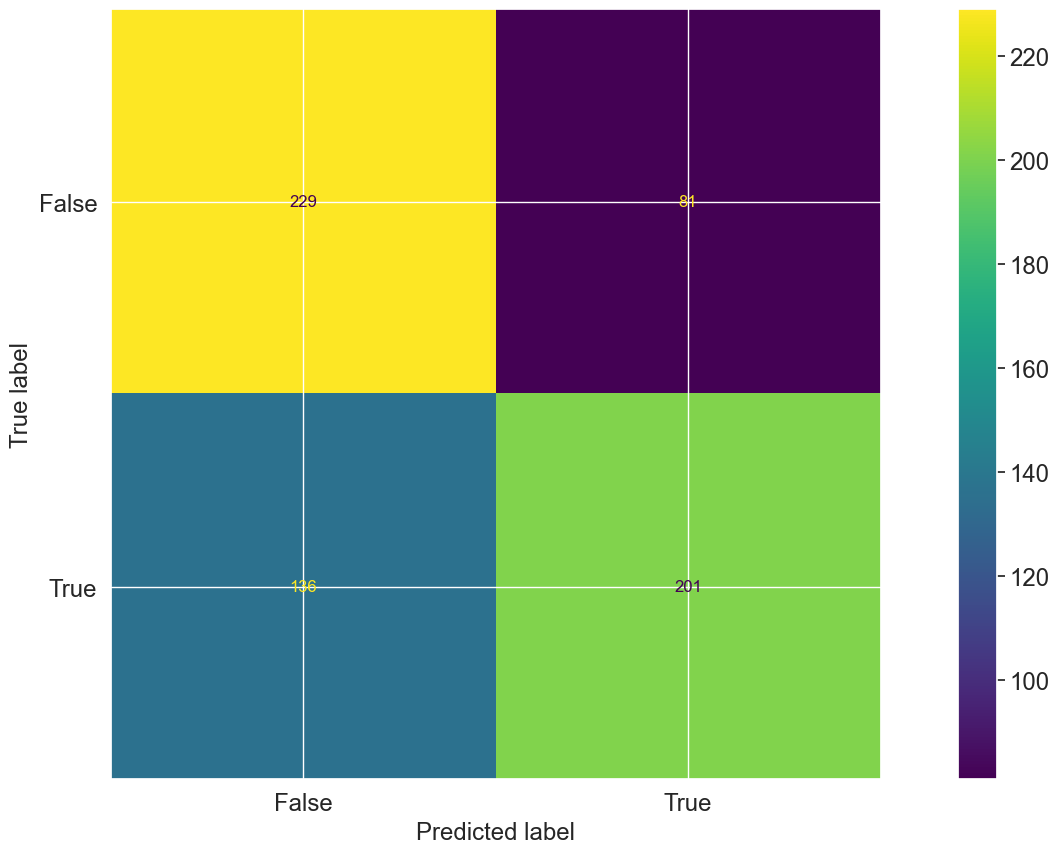

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Get the predicted classes
y_pred = log_reg.predict(vm_test_ds.x)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)
cm_display.plot()

We will now create a @vm.metric wrapper that will allow you to create a reusable custom metric. Note the following changes in the code below:

- The function `confusion_matrix` takes two arguments `dataset` and `model`. This is a `VMDataset` and `VMModel` object respectively.
  - `VMDataset` objects allow you to access the dataset's true (target) values by accessing the `.y` attribute.
  - `VMDataset` objects allow you to access the predictions for a given model by accessing the `.y_pred()` method.
- The function docstring provides a description of what the metric does. This will be displayed along with the result in this notebook as well as in the ValidMind platform.
- The function body calculates the confusion matrix using the `sklearn.metrics.confusion_matrix` function as we just did above.
- The function then returns the `ConfusionMatrixDisplay.figure_` object - this is important as the ValidMind framework expects the output of the custom metric to be a plot or a table.
- The `@vm.metric` decorator is doing the work of creating a wrapper around the function that will allow it to be run by the ValidMind framework. It also registers the metric so it can be found by the ID `my_custom_metrics.ConfusionMatrix` (see the section below on how test IDs work in ValidMind and why this format is important)


In [ ]:
@vm.metric("my_custom_metrics.ConfusionMatrix")
def confusion_matrix(dataset, model):
    """The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.

    The confusion matrix is a 2x2 table that contains 4 values:

    - True Positive (TP): the number of correct positive predictions
    - True Negative (TN): the number of correct negative predictions
    - False Positive (FP): the number of incorrect positive predictions
    - False Negative (FN): the number of incorrect negative predictions

    The confusion matrix can be used to assess the holistic performance of a classification model by showing the accuracy, precision, recall, and F1 score of the model on a single figure.
    """
    y_true = dataset.y
    y_pred = dataset.y_pred(model=model)

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[False, True]
    )
    cm_display.plot()

    plt.close()  # close the plot to avoid displaying it

    return cm_display.figure_  # return the figure object itself

You can now run the newly created custom metric on both the training and test datasets using the `run_test()` function:


In [ ]:
# Training dataset
result = vm.tests.run_test(
    "my_custom_metrics.ConfusionMatrix:training_dataset",
    inputs={"model": vm_model, "dataset": vm_train_ds},
)

In [ ]:
# Test dataset
result = vm.tests.run_test(
    "my_custom_metrics.ConfusionMatrix:test_dataset",
    inputs={"model": vm_model, "dataset": vm_test_ds},
)

#### Adding parameters to custom metrics

Custom metrics can take parameters just like any other function. Let's modify the `confusion_matrix` function to take an additional parameter `normalize` that will allow you to normalize the confusion matrix.


In [ ]:
@vm.metric("my_custom_metrics.ConfusionMatrix")
def confusion_matrix(dataset, model, normalize=False):
    """The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.

    The confusion matrix is a 2x2 table that contains 4 values:

    - True Positive (TP): the number of correct positive predictions
    - True Negative (TN): the number of correct negative predictions
    - False Positive (FP): the number of incorrect positive predictions
    - False Negative (FN): the number of incorrect negative predictions

    The confusion matrix can be used to assess the holistic performance of a classification model by showing the accuracy, precision, recall, and F1 score of the model on a single figure.
    """
    y_true = dataset.y
    y_pred = dataset.y_pred(model=model)

    if normalize:
        confusion_matrix = metrics.confusion_matrix(y_true, y_pred, normalize="all")
    else:
        confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[False, True]
    )
    cm_display.plot()

    plt.close()  # close the plot to avoid displaying it

    return cm_display.figure_  # return the figure object itself

#### Passing parameters to custom metrics

You can pass parameters to custom metrics by providing a dictionary of parameters to the `run_test()` function. The parameters will override any default parameters set in the custom metric definition. Note that `dataset` and `model` are still passed as `inputs`. Since these are `VMDataset` or `VMModel` inputs, they have a special meaning. When declaring a `dataset`, `model`, `datasets` or `models` argument in a custom metric function, the developer framework will expect these get passed as `inputs` to `run_test()` (or `run_documentation_tests()` instead).

Re-running the confusion matrix with `normalize=True` looks like this:


In [ ]:
# Test dataset with normalize=True
result = vm.tests.run_test(
    "my_custom_metrics.ConfusionMatrix:test_dataset_normalized",
    inputs={"model": vm_model, "dataset": vm_test_ds},
    params={"normalize": True},
)

#### Log the confusion matrix results

As you saw in the pearson correlation example, you can log any result to the ValidMind platform with the `.log()` method of the result object. This will allow you to add the result to the documentation.

You can now do the same for the confusion matrix results.


In [ ]:
result.log()

### Using external test providers

Creating inline custom tests with a function is a great way to add customize your model documentation. However, sometimes you may want to reuse the same set of tests across multiple models and share them with developers in your organization. In this case, you can create a custom test provider that will allow you to load custom tests from a local folder or a git repository.

In this section you will learn how to declare a local filesystem test provider that allows loading tests from a local folder following these high level steps:

1. Create a folder of custom tests from existing, inline tests.
2. Save an inline test to a file
3. Define and register a `LocalTestProvider` that points to that folder
4. Run test provider tests
5. Add the test results to your documentation


#### Create a folder of custom tests from existing, inline tests

Here you will create a new folder that will contain reusable, custom tests. The following code snippet will create a new `my_tests` directory in the current working directory if it doesn't exist.


In [ ]:
tests_folder = "my_tests"

import os

# create tests folder
os.makedirs(tests_folder, exist_ok=True)

# remove existing tests
for f in os.listdir(tests_folder):
    # remove files and pycache
    if f.endswith(".py") or f == "__pycache__":
        os.system(f"rm -rf {tests_folder}/{f}")

#### Save an inline test to a file

The `@vm.metric` decorator that was used above to register these as one-off custom tests also adds a convenience method to the function object that allows you to simply call `<func_name>.save()` to save it to a file. This will save the function to a Python file to a path you specify. In this case, you can pass the variable `tests_folder` to save it to the custom tests folder we created.

Normally, this will get you started by creating the file and saving the function code with the correct name. But it won't automatically add any import or other functions/variables outside of the function that are needed for the test to run. The `save()` method allows you to pass an optional `imports` argument that will ensure the necessary imports are added to the file.

For the `confusion_matrix` metric, note the imports that are required for the function to run properly:

```python
import matplotlib.pyplot as plt
from sklearn import metrics
```

You can pass these imports to the `save()` method to ensure they are included in the file with the following command:


In [ ]:
confusion_matrix.save(
    tests_folder,
    imports=["import matplotlib.pyplot as plt", "from sklearn import metrics"],
)

2024-04-26 11:34:27,853 - INFO(validmind.tests.decorator): Saved to /Users/andres/code/validmind-sdk/notebooks/tutorials/my_tests/ConfusionMatrix.py!Be sure to add any necessary imports to the top of the file.
2024-04-26 11:34:27,856 - INFO(validmind.tests.decorator): This metric can be run with the ID: <test_provider_namespace>.ConfusionMatrix
2024-04-26 11:34:27,856 - INFO(validmind.tests.decorator): This metric can be run with the ID: <test_provider_namespace>.ConfusionMatrix


**What happened?**

The `save()` method saved the `confusion_matrix` function to a file named `ConfusionMatrix.py` in the `my_tests` directory. Note that the new file provides some context on the origin of the test, which is useful for traceability.

```
# Saved from __main__.confusion_matrix
# Original Test ID: my_custom_metrics.ConfusionMatrix
# New Test ID: <test_provider_namespace>.ConfusionMatrix
```

Additionally, the new test function has been stripped off its decorator, as it now resides in a file that will be loaded by the test provider:

```python
def ConfusionMatrix(dataset, model, normalize=False):
```


#### Define and register a `LocalTestProvider` that points to that folder.

With the `my_tests` folder now having a sample custom test, you can now initialize a test provider that will tell the Developer Framework where to find these tests. ValidMind offers out-of-the-box test providers for local tests (i.e. tests in a folder) or a Github provider for tests in a Github repository. You can also create your own test provider by creating a class that has a `load_test` method that takes a test ID and returns the test function matching that ID.

The most important attribute for a test provider is its `namespace`. This is a string that will be used to prefix test IDs in model documentation. This allows you to have multiple test providers with tests that can even share the same ID, but are distinguished by their namespace.

An extended introduction to test providers can be found in [this](../code_samples/custom_tests/external_test_providers.ipynb) notebook.

### Initializing a local test provider

For most use-cases, the local test provider should be sufficient. This test provider allows you load custom tests from a designated directory. Let's go ahead and see how we can do this with our custom tests.


In [ ]:
from validmind.tests import LocalTestProvider

# initialize the test provider with the tests folder we created earlier
my_test_provider = LocalTestProvider(tests_folder)

vm.tests.register_test_provider(
    namespace="my_test_provider",
    test_provider=my_test_provider,
)
# `my_test_provider.load_test()` will be called for any test ID that starts with `my_test_provider`
# e.g. `my_test_provider.ConfusionMatrix` will look for a function named `ConfusionMatrix` in `my_tests/ConfusionMatrix.py` file

#### Run test provider tests

Now that you have set up the test provider, you can run any test that's located in the tests folder by using the `run_test()` method as with any other test. For tests that reside in a test provider directory, the test ID will be the `namespace` specified when registering the provider, followed by the path to the test file relative to the tests folder. For example, the Confusion Matrix test we created earlier will have the test ID `my_test_provider.ConfusionMatrix`. You could organize the tests in subfolders, say `classification` and `regression`, and the test ID for the Confusion Matrix test would then be `my_test_provider.classification.ConfusionMatrix`.

Let's go ahead and re-run the confusion matrix test by using the test ID `my_test_provider.ConfusionMatrix`. This should load the test from the test provider and run it as before.


In [ ]:
result = vm.tests.run_test(
    "my_test_provider.ConfusionMatrix:test_dataset_normalized",
    inputs={"model": vm_model, "dataset": vm_test_ds},
    params={"normalize": True},
)

result.log()

#### Add the test results to your documentation

You have already seen how to add individual results to the model documentation using the platform. Let's repeat the process and add the confusion matrix to the `Model Development` -> `Model Evaluation` section of the documentation. The "add test driven block" dialog should now show the new test result coming from the test provider:

![screenshot showing confusion matrix result](../images/insert-test-driven-block-custom-confusion-matrix.png)


## 4. Finalize testing and documentation

In this section we cover how to finalize the testing and documentation of your model by focusing on:

1. Using `run_documentation_tests()` to run custom tests as part of your documentation template suite
2. Viewing and updating the configuration for the entire model documentation template


#### Using `run_documentation_tests()` to run custom tests as part of your documentation template suite

The process for adding additional custom tests will be similar to the one you followed for the confusion matrix test. In general there will be two approaches to add new tests to a test provider:

- Writing one-off custom tests inline and saving them to the test provider directory
- Writing test files directly to the test provider directory

In both cases you will be able to run tests and add them to your model documentation as we saw above. After those tests are added to the document they should also be reflected in the documentation template returned by `vm.preview_template()`. First, we need to reload the connection to the ValidMind platform so that the documentation template definition gets refreshed:


In [ ]:
vm.reload()

2024-04-26 14:23:40,997 - INFO(validmind.api_client): Connected to ValidMind. Project: [Int. Tests] Customer Churn - Initial Validation (cltnl29bz00051omgwepjgu1r)


Now, run `preview_template()` and verify that the new confusion matrix test you added is included in the proper section.


In [ ]:
vm.preview_template()

Accordion(children=(Accordion(children=(VBox(children=(HTML(value='\n<div\n  class="lm-Widget p-Widget jupyter…

Since the test ID is now registered in the document you can now run tests for an entire section and all additional custom tests should be loaded without issues. Let's run all tests in the `model_evaluation` section of the documentation. Note that we have been running the sample custom confusion matrix with `normalize=True` to demonstrate the ability to provide custom parameters.

In the `Run the model evaluation tests` section above you learned how to assign inputs to individual tests with `run_documentation_tests()`. Assigning parametesr is similar, you only need to provide assign a `params` dictionary to a given test ID, `my_test_provider.ConfusionMatrix` in this case.

Additionally, recall from the `Log the individual result high correlation test using "vm_raw_dataset" (no data cleanup)` section that you can tag individual results for a test with `result_id`s. The template output above shows that we have added the following test ID to the template:

```python
# <test_id>:<result_id>
my_test_provider.ConfusionMatrix:test_dataset_normalized
```

We will use this test ID in the `test_config` assignment below.


In [ ]:
test_config = {
    "validmind.model_validation.sklearn.ClassifierPerformance:in_sample": {
        "inputs": {
            "dataset": vm_train_ds,
            "model": vm_model,
        },
    },
    "my_test_provider.ConfusionMatrix:test_dataset_normalized": {
        "params": {"normalize": True},
    },
}
results = vm.run_documentation_tests(
    section=["model_evaluation"],
    inputs={
        "dataset": vm_test_ds,  # Any test that requires a single dataset will use vm_test_ds
        "model": vm_model,
        "datasets": (
            vm_train_ds,
            vm_test_ds,
        ),  # Any test that requires multiple datasets will use vm_train_ds and vm_test_ds
    },
    config=test_config,
)

/Users/andres/code/validmind-sdk/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



#### Viewing and updating the configuration for the entire model documentation template

In most instances you will want to run tests for one section at a time, as we have seen in the examples above. However, you can also run all tests for the entire documentation at once. The only difference is that you will need to provide a `config` dictionary that contains the necessary mapping of test IDs for every existing test in the template.

The developer framework provides a utility function called `vm.get_test_suite().get_default_config()` that allows you to render the default configuration for the entire documentation template. This configuration will contain all the test IDs and their default parameters. You can then modify this configuration as needed and pass it to `run_documentation_tests()` to run all tests in the documentation template. You also have the option to continue running tests for one section at a time, `get_default_config()` still provides a useful reference for providing default parametes to every test.


In [ ]:
import json

project_test_suite = vm.get_test_suite()
config = project_test_suite.get_default_config()
print("Suite Config: \n", json.dumps(config, indent=2))

Suite Config: 
 {
  "validmind.data_validation.DatasetDescription": {
    "inputs": {
      "dataset": null
    },
    "params": {}
  },
  "validmind.data_validation.ClassImbalance": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "min_percent_threshold": 10
    }
  },
  "validmind.data_validation.Duplicates": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "min_threshold": 1
    }
  },
  "validmind.data_validation.HighCardinality": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "num_threshold": 100,
      "percent_threshold": 0.1,
      "threshold_type": "percent"
    }
  },
  "validmind.data_validation.MissingValues": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "min_threshold": 1
    }
  },
  "validmind.data_validation.Skewness": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "max_threshold": 1
    }
  },
  "validmind.data_validation.UniqueRows": {
    "inputs": {
      "dat

##### Updating config

Note that the default config does not assign any inputs to a test, this is expected. You can assign inputs to individual tests as needed, depending on the datasets and models you want to pass to individual tests. The `config` dictionary, as a mapping of test IDs to test configurations allows you to do this.

For this particular template, the developer framework provides a sample configuration that can be used to populate the entire model documentation using the following inputs:

- A `raw` dataset without any preprocessing
- A `training` dataset
- A `test` dataset
- A trained `model` instance


In [ ]:
from validmind.datasets.classification import customer_churn
from validmind.utils import preview_test_config

test_config = customer_churn.get_demo_test_config()
preview_test_config(test_config)

Using this sample configuration, let's now populate the entire `data_preparation` section of the documentation. Note the reference to a `raw_dataset` in the config object. We have already a dataset with that `input_id` at the beginning of the notebook:

```python
vm_raw_dataset = vm.init_dataset(
    dataset=df_raw,
    input_id="raw_dataset",
    target_column="Exited",
)
```


In [ ]:
config = {
    "validmind.data_validation.DatasetDescription": {
        "inputs": {"dataset": "raw_dataset"},
    },
    "validmind.data_validation.ClassImbalance": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"min_percent_threshold": 10},
    },
    "validmind.data_validation.Duplicates": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"min_threshold": 1},
    },
    "validmind.data_validation.HighCardinality": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {
            "num_threshold": 100,
            "percent_threshold": 0.1,
            "threshold_type": "percent",
        },
    },
    "validmind.data_validation.MissingValues": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"min_threshold": 1},
    },
    "validmind.data_validation.Skewness": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"max_threshold": 1},
    },
    "validmind.data_validation.UniqueRows": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"min_percent_threshold": 1},
    },
    "validmind.data_validation.TooManyZeroValues": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"max_percent_threshold": 0.03},
    },
    "validmind.data_validation.IQROutliersTable": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"threshold": 1.5},
    },
    "validmind.data_validation.IQROutliersBarPlot": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"threshold": 1.5, "fig_width": 800},
    },
    "validmind.data_validation.DescriptiveStatistics": {
        "inputs": {"dataset": "raw_dataset"},
    },
    "validmind.data_validation.PearsonCorrelationMatrix": {
        "inputs": {"dataset": "raw_dataset"},
    },
    "validmind.data_validation.HighPearsonCorrelation:vm_raw_dataset": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"max_threshold": 0.3},
    },
    "validmind.data_validation.HighPearsonCorrelation": {
        "inputs": {"dataset": "raw_dataset"},
        "params": {"max_threshold": 0.3},
    },
}

full_suite = vm.run_documentation_tests(
    section="data_preparation",
    config=config,
)

## Where to go from here
